# Laboratorio 1: Regresión en Boston

En este laboratorio deben hacer experimentos de regresión con el conjunto de datos "Boston house prices dataset".

Estudiarán el dataset, harán visualizaciones y seleccionarán atributos relevantes a mano.

Luego, entrenarán y evaluarán diferentes tipos de regresiones, buscando las configuraciones que mejores resultados den.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Carga del Conjunto de Datos

Cargamos el conjunto de datos y vemos su contenido.

In [2]:
from sklearn.datasets import load_boston
boston = load_boston()
boston.keys()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

In [3]:
print(boston['DESCR'])   # descripción del dataset
print(boston['data'])           # matriz con los datos de entrada (atributos)
#print(boston['target'])         # vector de valores a predecir
#print(boston['feature_names']  # nombres de los atributos para cada columna de 'data'

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [4]:
boston['data'].shape, boston['target'].shape

((506, 13), (506,))

## División en Entrenamiento y Evaluación

Dividimos aleatoriamente los datos en 80% para entrenamiento y 20% para evaluación:

In [5]:
from sklearn.model_selection import train_test_split
X, y = boston['data'], boston['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train.shape, X_test.shape

((404, 13), (102, 13))

## Ejercicio 1: Descripción de los Datos y la Tarea

Responda las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponibles para hacer la predicción?
4. ¿Qué atributos imagina ud. que serán los más determinantes para la predicción?
5. ¿Qué problemas observa a priori en el conjunto de datos? ¿Observa posibles sesgos, riesgos, dilemas éticos, etc? Piense que los datos pueden ser utilizados para hacer predicciones futuras.

**No hace falta escribir código para responder estas preguntas.**

1. El conjunto de datos muestra la relación entre variables como son el crimen, el tamaño de los lotes residenciales, la cantidad de lotes utilizados para otros fines, cantidad de habitaciones promedio, etc. con el precio de las casas. 
2. Lo que buscamos predecir es el precio de las casas en funcion de los atributos dados. Lo cual implicará que dada ciertas características de las casas, podremos establecer un precio. 
3. Los atributos disponibles son:
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
        - B        1000(Bk - 0.63)^2 where Bk is the proportion of black people by town
        - LSTAT    % lower status of the population
        - MEDV     Median value of owner-occupied homes in $1000's

4. A nuestro entender los mejores atributos son: CRIM, RM, ZN, PTRATIO 

5. Hay una falta etica grave al establecer la proporcion de personas de raza negra como un factor para establecer, y mas aún, predecir el precio de las viviendas 


## Ejercicio 2: Visualización de los Datos

1. Para cada atributo de entrada, haga una gráfica que muestre su relación con la variable objetivo.
2. Estudie las gráficas, identificando **a ojo** los atributos que a su criterio sean los más informativos para la predicción.
3. Para ud., ¿cuáles son esos atributos? Lístelos en orden de importancia.

Text(0.5, 1.0, 'CRIM')

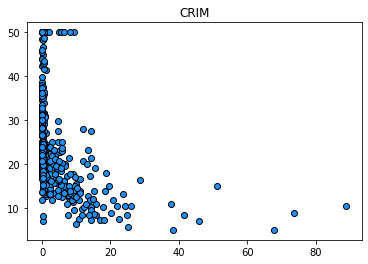

In [6]:
# 1. Resolver acá. Ayuda/ejemplo:
feature = 'CRIM'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)

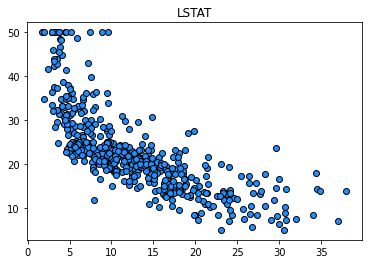

In [7]:
# 1. Resolver acá. Ayuda/ejemplo:
feature = 'LSTAT'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

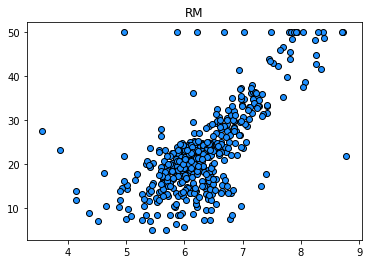

In [8]:
feature = 'RM'
selector = (boston['feature_names'] == feature)
plt.scatter(X[:, selector], y, facecolor="dodgerblue", edgecolor="k", label="datos")
plt.title(feature)
plt.show()

**3. Entre los atributos que identificamos como mas "informativos" para la predicción, identificamos RM: cantidad de habitaciones por casa, LSTAT que se podria traducir como cantidad de población con menor nivel social. En crimen podemos ver una pequeña recta en su inicio indicando un descenso del precio.**

## Ejercicio 3: Regresión Lineal

1. Seleccione **un solo atributo** que considere puede ser el más apropiado.
2. Instancie una regresión lineal de **scikit-learn**, y entrénela usando sólo el atributo seleccionado.
3. Evalúe, calculando error cuadrático medio para los conjuntos de entrenamiento y evaluación.
4. Grafique el modelo resultante, junto con los puntos de entrenamiento y evaluación.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se puede obtener un error en test menor a 50.

In [9]:
# 1. Resolver acá. Ayuda:
feature = 'RM'  # selecciono el atributo 'RM'
selector = (boston['feature_names'] == feature)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)
X_train_f = X_train[:, selector]
X_test_f = X_test[:, selector]
X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

In [10]:
from sklearn.linear_model import LinearRegression
model1=LinearRegression()
model1.fit(X_train_f, y_train)

LinearRegression()

In [11]:
model1.coef_

array([9.37638431])

In [12]:
model1.intercept_

-36.476189627647315

In [13]:
# 3. Predecir y evaluar acá.

y_train_pred = model1.predict(X_train_f)
y_val_pred = model1.predict(X_test_f)

In [14]:
from sklearn.metrics import mean_squared_error

train_error = mean_squared_error(y_train, y_train_pred)
val_error = mean_squared_error(y_test, y_val_pred)
print(f'Train error: {train_error:0.2}')
print(f'Test error: {val_error:0.2}')

Train error: 4.3e+01
Test error: 4.7e+01


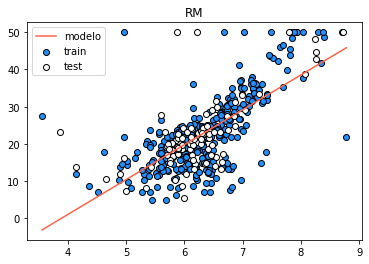

In [15]:
# 4. Graficar acá. Ayuda:
x_start = min(np.min(X_train_f), np.min(X_test_f))
x_end = max(np.max(X_train_f), np.max(X_test_f))
x = np.linspace(x_start, x_end, 200).reshape(-1, 1)
plt.plot(x, model1.predict(x), color="tomato", label="modelo")

plt.scatter(X_train_f, y_train, facecolor="dodgerblue", edgecolor="k", label="train")
plt.scatter(X_test_f, y_test, facecolor="white", edgecolor="k", label="test")
plt.title(feature)
plt.legend()
plt.show()

**5. Como podemos ver en el gráfico, el modelo obtiene una linea siguiendo una tendencia.**

## Ejercicio 4: Regresión Polinomial

En este ejercicio deben entrenar regresiones polinomiales de diferente complejidad, siempre usando **scikit-learn**.

Deben usar **el mismo atributo** seleccionado para el ejercicio anterior.

1. Para varios grados de polinomio, haga lo siguiente:
    1. Instancie y entrene una regresión polinomial.
    2. Prediga y calcule error en entrenamiento y evaluación. Imprima los valores.
    3. Guarde los errores en una lista.
2. Grafique las curvas de error en términos del grado del polinomio.
3. Interprete la curva, identificando el punto en que comienza a haber sobreajuste, si lo hay.
4. Seleccione el modelo que mejor funcione, y grafique el modelo conjuntamente con los puntos.
5. Interprete el resultado, haciendo algún comentario sobre las cualidades del modelo obtenido.

**Observación:** Con algunos atributos se pueden obtener errores en test menores a 40 e incluso a 35.

In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
degree = 2
pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
model = make_pipeline(pf, lr)

In [17]:
X_train_f= X_train_f.reshape(-1, 1)
X_test_f = X_test_f.reshape(-1, 1)
X_train_f.shape, X_test_f.shape

((404, 1), (102, 1))

In [18]:
model.fit(X_train_f, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [19]:
Z_train = pf.fit_transform(X_train_f, y_train)
lr.fit(Z_train, y_train)

LinearRegression(fit_intercept=False)

In [20]:
lr.coef_

array([ 68.20229886, -23.56509374,   2.56037958])

In [21]:
lr.intercept_

0.0

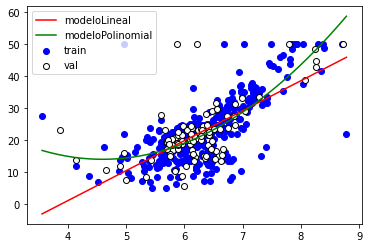

In [22]:
# 2. Graficar curvas de error acá.
plt.scatter(X_train_f, y_train, color="blue", label="train")
plt.plot(x, model1.predict(x.reshape(-1, 1)), color="red", label="modeloLineal")
plt.scatter(X_test_f, y_test, color="white", edgecolor="k", label="val")
plt.plot(x, model.predict(x.reshape(-1, 1)), color="green", label="modeloPolinomial")
plt.legend()
plt.show()

In [23]:
y_train_pred = model.predict(X_train_f)
y_val_pred = model.predict(X_test_f)

In [24]:
y_test.shape

(102,)

In [25]:
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(y_train, y_train_pred)
val_error = mean_squared_error(y_test, y_val_pred)
print(f'Train error: {train_error:0.2}')
print(f'Test error: {val_error:0.2}')

Train error: 3.8e+01
Test error: 4e+01


# Curvas de error en términos del grado del polinomio.

In [26]:
train_errors = []
val_errors = []
degrees = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
for degree in degrees:
    # train:
    pf = PolynomialFeatures(degree)
    lr = LinearRegression(fit_intercept=False)
    model = make_pipeline(pf, lr)
    model.fit(X_train_f, y_train)
    
    # predict:
    y_train_pred = model.predict(X_train_f)
    y_val_pred = model.predict(X_test_f)
    
    # evaluate:
    train_error = mean_squared_error(y_train, y_train_pred)
    val_error = mean_squared_error(y_test, y_val_pred)
    train_errors.append(train_error)
    val_errors.append(val_error)

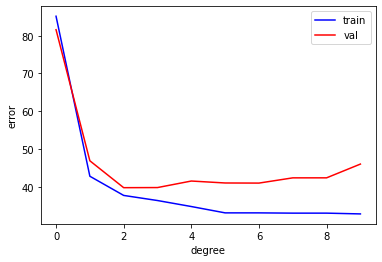

In [27]:
plt.plot(degrees, train_errors, color="blue", label="train")
plt.plot(degrees, val_errors, color="red", label="val")
plt.legend()
plt.xlabel("degree")
plt.ylabel("error")
plt.show()

**3. Vemos que tenemos sobre ajuste despues del grado 3.**

**4. Para reconstruir mejor el modelo lo haremos en grado 3.**

In [28]:
degree = 3
pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False)  # el bias ya esta como feature
model = make_pipeline(pf, lr)

In [29]:
model.fit(X_train_f, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [30]:
Z_train = pf.fit_transform(X_train_f, y_train)
lr.fit(Z_train, y_train)

LinearRegression(fit_intercept=False)

In [31]:
lr.coef_

array([ 274.12931892, -124.87102604,   18.86964785,   -0.85958803])

In [32]:
lr.intercept_

0.0

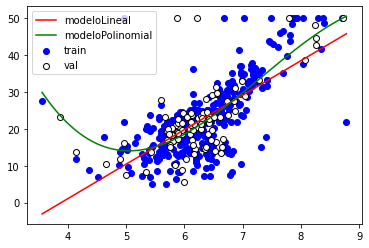

In [33]:
# 2. Graficar curvas de error acá.
plt.scatter(X_train_f, y_train, color="blue", label="train")
plt.plot(x, model1.predict(x.reshape(-1, 1)), color="red", label="modeloLineal")
plt.scatter(X_test_f, y_test, color="white", edgecolor="k", label="val")
plt.plot(x, model.predict(x.reshape(-1, 1)), color="green", label="modeloPolinomial")
plt.legend()
plt.show()

In [34]:
y_train_pred = model.predict(X_train_f)
y_val_pred = model.predict(X_test_f)

In [35]:
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(y_train, y_train_pred)
val_error = mean_squared_error(y_test, y_val_pred)
print(f'Train error: {train_error:0.2}')
print(f'Test error: {val_error:0.2}')

Train error: 3.6e+01
Test error: 4e+01


**5. Vemos que con un modelo de grado 3 baja el error de entrenamiento aunque se mantiene el error de testeo.** 

## Ejercicio 5: Regresión con más de un Atributo

En este ejercicio deben entrenar regresiones que toman más de un atributo de entrada.

1. Seleccione **dos o tres atributos** entre los más relevantes encontrados en el ejercicio 2.
2. Repita el ejercicio anterior, pero usando los atributos seleccionados. No hace falta graficar el modelo final.
3. Interprete el resultado y compare con los ejercicios anteriores. ¿Se obtuvieron mejores modelos? ¿Porqué?

In [36]:
# 1. Resolver acá. Ayuda (con dos atributos):
selector = (boston['feature_names'] == 'RM') | (boston['feature_names'] == 'LSTAT')
X_train_fs = X_train[:, selector]
X_test_fs = X_test[:, selector]
X_train_fs.shape, X_test_fs.shape

((404, 2), (102, 2))

In [37]:
degree = 1
pf = PolynomialFeatures(degree)
lr = LinearRegression(fit_intercept=False)  
model3 = make_pipeline(pf, lr)

In [38]:
model3.fit(X_train_fs, y_train)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=1)),
                ('linearregression', LinearRegression(fit_intercept=False))])

In [39]:
Z_train = pf.fit_transform(X_train_fs, X_test_fs)
lr.fit(Z_train, y_train)

LinearRegression(fit_intercept=False)

**2.**

In [40]:
y_train_pred1 = model3.predict(X_train_fs)
y_val_pred1 = model3.predict(X_test_fs)

In [41]:
from sklearn.metrics import mean_squared_error
train_error = mean_squared_error(y_train, y_train_pred)
val_error = mean_squared_error(y_test, y_val_pred)
print(f'Train error: {train_error:0.2}')
print(f'Test error: {val_error:0.2}')

Train error: 3.6e+01
Test error: 4e+01


Text(0.5, 1.0, 'Dos atributos')

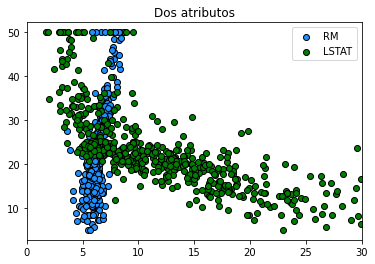

In [42]:
feature = 'RM'
feature2 = "LSTAT"
selector1 = (boston['feature_names'] == feature)
selector2 = (boston['feature_names'] == feature2)
plt.scatter(X[:, selector1], y, facecolor="dodgerblue", edgecolor="k", label="RM")
plt.scatter(X[:, selector2], y, facecolor="green", edgecolor="k", label="LSTAT")
#plt.plot(x, model3.predict(x.reshape(-1, 1)), color="red", label="modeloLineal")
plt.xlim(0, 30)
plt.legend()
plt.title("Dos atributos")

**3.Segun los resultados obtenidos y en funcion a la tasa de error, se obtiene mejores resultados en el train pero peores en el test.**

## Más ejercicios (opcionales)

### Ejercicio 6: A Todo Feature

Entrene y evalúe regresiones pero utilizando todos los atributos de entrada (va a andar mucho más lento). Estudie los resultados.

### Ejercicio 7: Regularización

Entrene y evalúe regresiones con regularización "ridge". Deberá probar distintos valores de "alpha" (fuerza de la regularización). ¿Mejoran los resultados?
